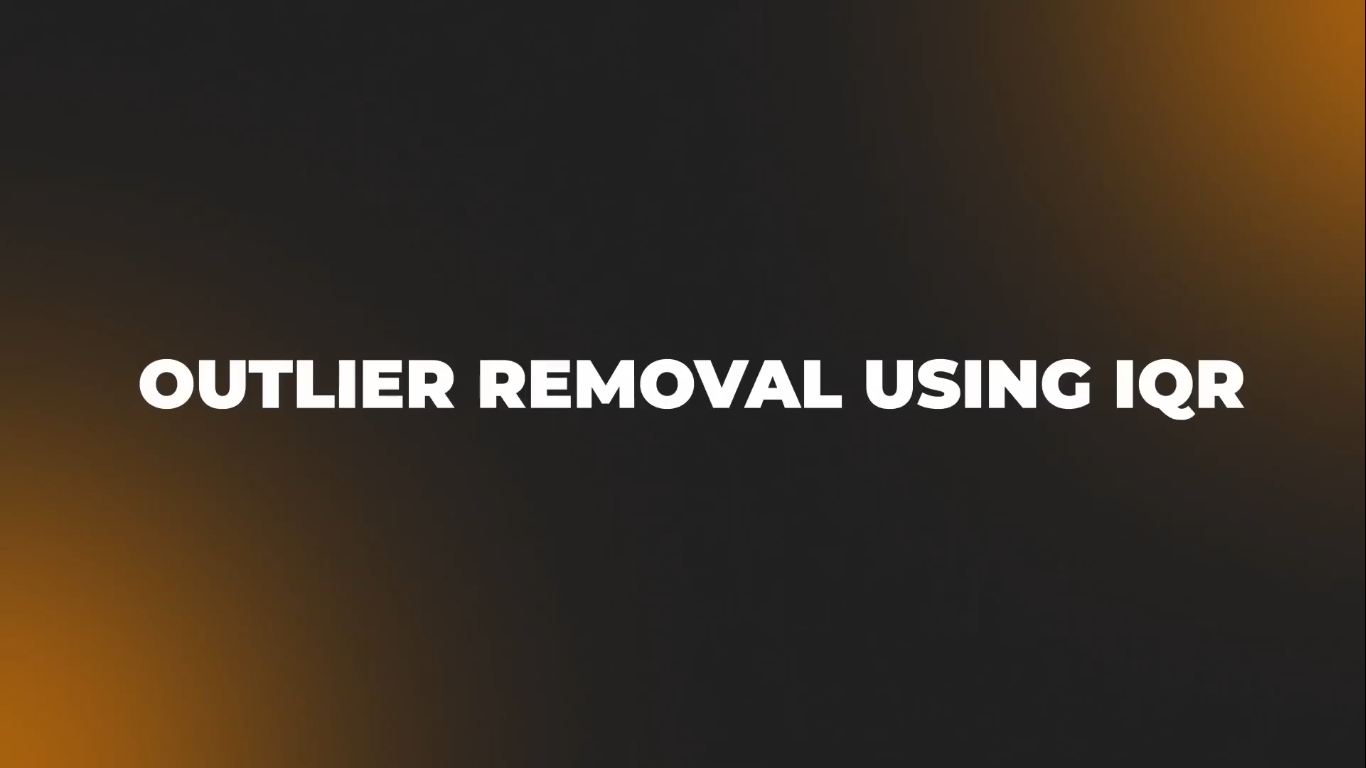

In [1]:
from IPython.display import Image, display
display(Image(filename=r"H:\Programming\Files\Machine Learning\photos\C_09.1.1.png"))

In [30]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

import warnings 
warnings.filterwarnings('ignore')

In [49]:
df = pd.read_csv(r"H:\Programming\Files\Machine Learning\Files\Loan Dataset.csv")
df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
# Fill NaN Value by mode 

for i in df.columns:
    df[i].fillna(df[i].mode()[0], inplace=True)

df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Check **Outlier**

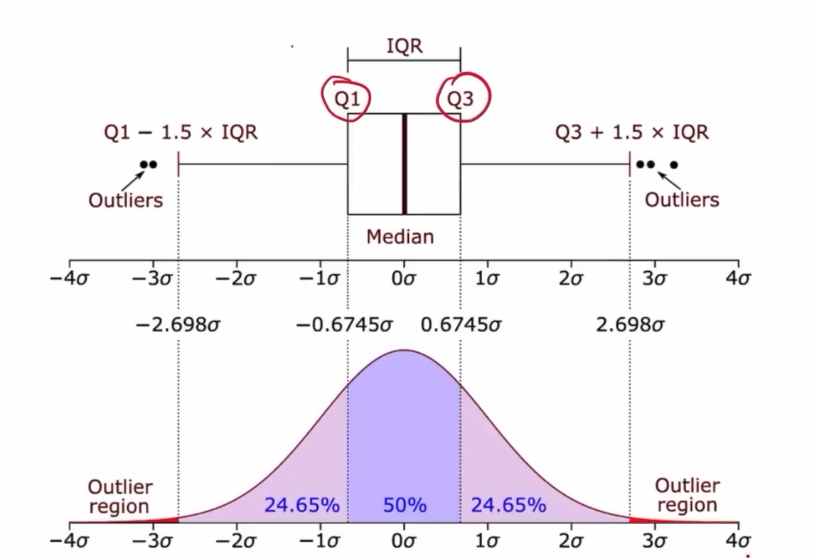

In [77]:
from IPython.display import Image, display
display(Image(filename=r"H:\Programming\Files\Machine Learning\photos\C_09.2.png"))

## using Boxplot

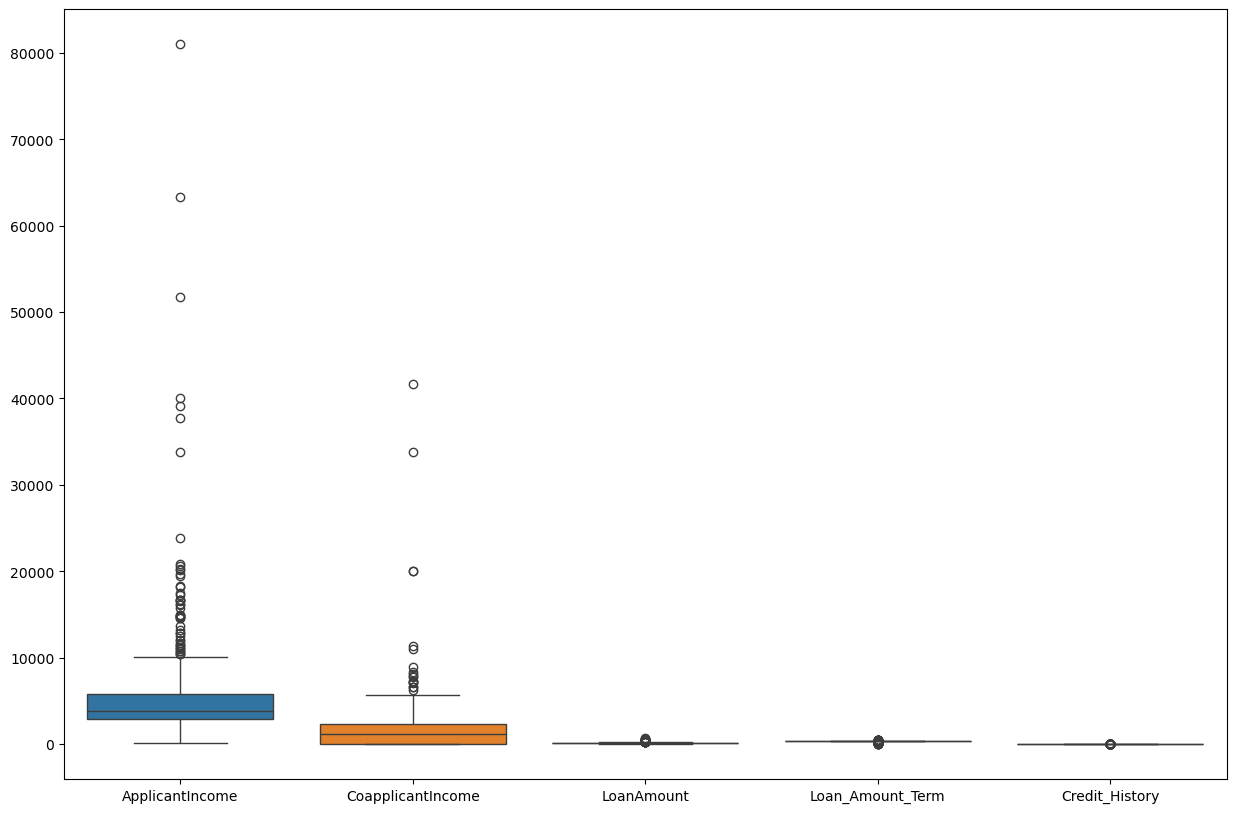

In [53]:
plt.figure(figsize=(15,10))
sns.boxplot(df)
plt.show()

## Using distplot 
### we can see plot tail as a outlier 

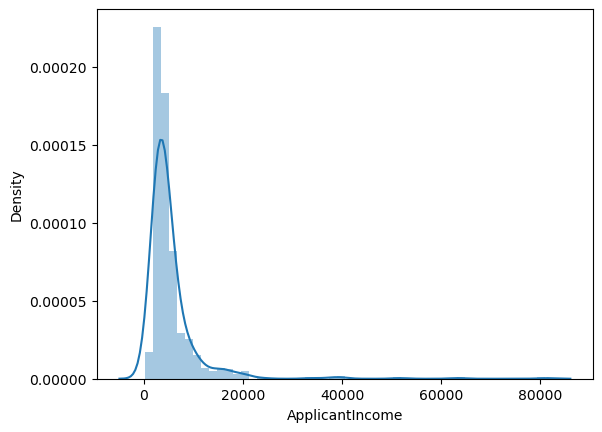

In [32]:

sns.distplot(df['ApplicantIncome'])
plt.show()

# Remove Outlier using **IQR Mathode**

In [58]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


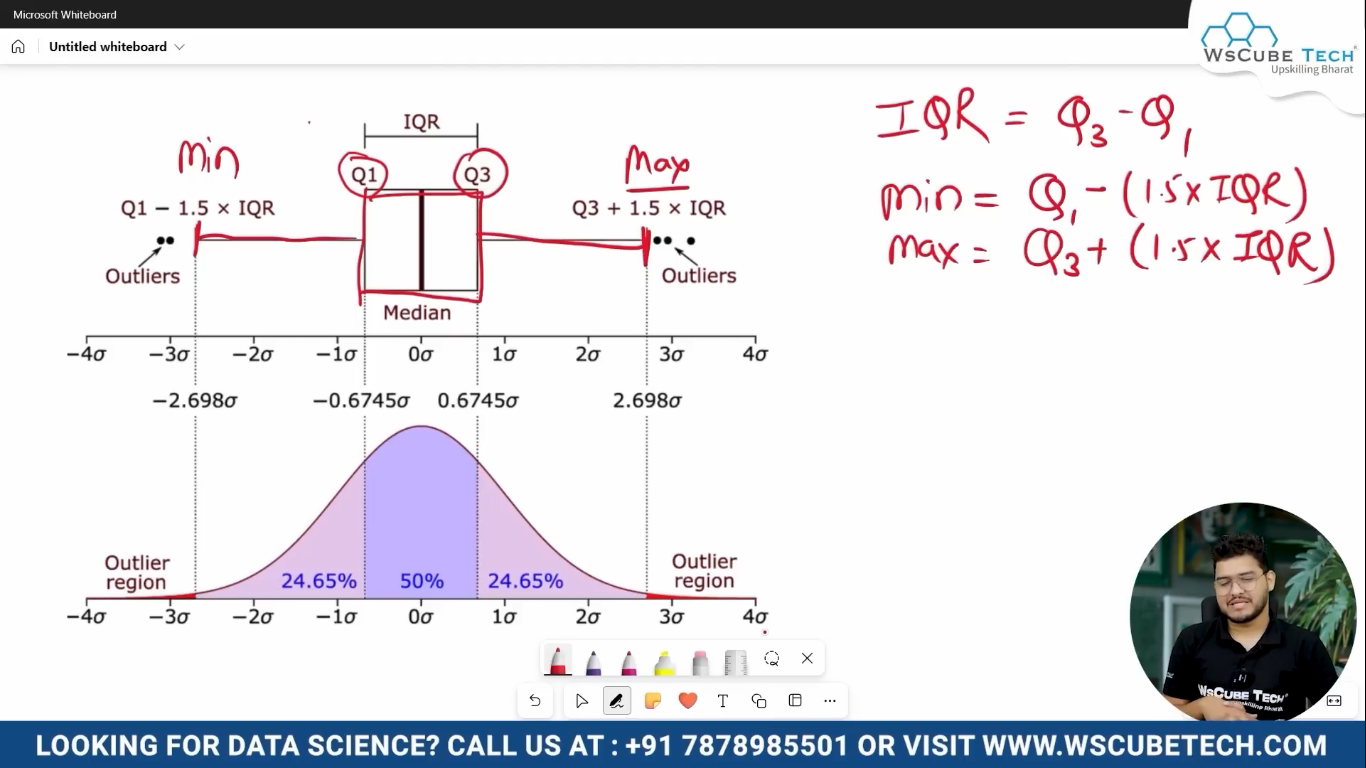

In [79]:
from IPython.display import Image, display
display(Image(filename=r"H:\Programming\Files\Machine Learning\photos\C_09.3.png"))

In [61]:
q1 = df['ApplicantIncome'].quantile(0.25)
q3 = df['ApplicantIncome'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = q3 - q1 

# Define the lower and upper bounds for outlier detection
min_range = q1 - (1.5 * IQR)
max_range = q3 + (1.5 * IQR)

# Corrected line for filtering the DataFrame
new_df = df[ (df['ApplicantIncome'] >= min_range) & (df['ApplicantIncome'] <= max_range) ]

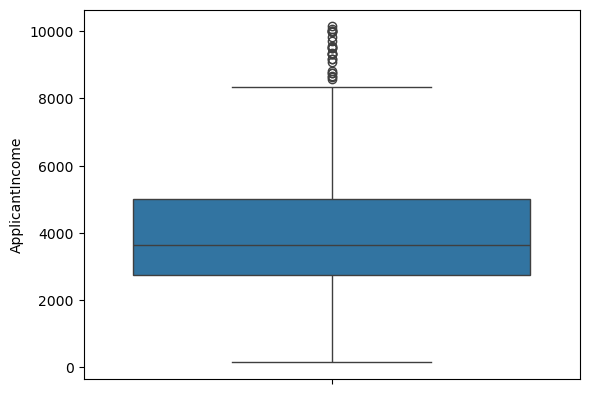

In [69]:
sns.boxplot(new_df['ApplicantIncome'])
plt.show()